In [31]:
import pyreadstat
import numpy as np
from prince import MCA
from matplotlib.pyplot import figure
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KDTree

%matplotlib inline

In [2]:
#Load the data
wave1_merge = "/Users/kirill/Downloads/data 2/W1 Merged Data/Wave.1_Data/Merge/Wave1_20170906.sav"
wave2_merge = "/Users/kirill/Downloads/data 2/W2 Merged Data/2w-3rd_release_all/merge/Wave2_20170724.sav"

df1, meta1 = pyreadstat.read_sav(wave1_merge)
df2, meta2 = pyreadstat.read_sav(wave2_merge)
wave1_columns = df1.columns
wave2_columns = df2.columns

In [3]:
#Identify columns with many entries (to check if any are numerical)
for c in df2.columns:
    if len(list(df2[c].unique())) > 14:
        print(c)

idnumber
q20_1
q20_2
q20_3
q39
q54
q91_1
q91_2
q91_3
q100
q101
q102
q160
q161
q162
q163
q164
q165
q166
se3a
se5a
se6
se8a
ir2b
ir9_2
w_all


In [195]:
# df2['se2'].unique()
# df2.se2.value_counts().sort_values().plot(kind = 'bar')
df2['se2'].isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

AttributeError: 'numpy.int64' object has no attribute 'reset_index'

In [4]:
#Drop columns that have no disambiguation or are not crucial for analysis

df2_trunc = df2.drop(['w_all', 'ir9_2', 'idnumber'], axis=1, inplace=False)
df2_trunc_no_mongol_no_camb = df2_trunc[(df2_trunc['country']!=5) & (df2_trunc['country']!=12)]
# df2_trunc[df2_trunc['q6'].isna()]['country'].hist()
count = 0
silen_countries = {}
cols_to_drop = []
for c in df2_trunc_no_mongol_no_camb.columns:
    if df2_trunc_no_mongol_no_camb[c].isnull().values.any():
        print(c)
        unique_countries = list(df2_trunc_no_mongol_no_camb[df2_trunc_no_mongol_no_camb[c].isna()]['country'].unique())
        cols_to_drop += [c]
        if len(unique_countries) == 1:
            if unique_countries[0] not in silen_countries.keys():
                silen_countries[unique_countries[0]] = 1
            else:
                silen_countries[unique_countries[0]] += 1
        print('\n')
    if not df2_trunc_no_mongol_no_camb[c].isnull().values.any():
        count += 1
print(silen_countries) 
print(count)
df2_trunc_no_nan = df2_trunc_no_mongol_no_camb.drop(cols_to_drop, axis=1, inplace=False)
# df2_trunc = df2_trunc.fillna(-1)

q7


q18


q19


q20_3


q26


q27


q28


q29


q30


q31


q33


q34


q35


q36


q37


q38


q39


q39a


q40


q41


q42


q43


q44


q45


q46


q47


q51_1


q51_2


q51_3


q51_4


q51_5


q51_6


q51_7


q51_8


q51a


q54


q55


q57


q59


q61


q63


q64


q65


q69


q70


q71


q72


q74


q78


q80


q82


q83


q84


q85


q86


q87


q88


q89


q90


q91_1


q91_2


q91_3


q94


q99


q100


q101


q102


q102a


q103


q105


q106


q107


q114


q115


q117


q118


q119_1


q119_2


q119_3


q125


q131


q132


q142


q143


q144


q145


q146


q147


q148


q149


q150


q156


q157


q158


q159


q160


q161


q162


q163


q164


q165


q166


se2


se3a


se5


se5a


se7


se7a


se8a


se8b


se9


se9a


se10a


se10b


se10c


se10d


se10e


se10f


se10g


se10h


se10i


se10j


se10k


se10l


se10m


se10n


se10o


se11


se12a


se12b


ir2


ir2a


ir2b


ir3


ir3a_1


ir3a_2


ir3a_3


ir3a_4


ir3a_5


ir3a_6


ir4


ir5


ir6


ir7


ir8



In [5]:
#Qs to use (wave1, wave2)
#yrsurvey and ir9_3
#q004 and q4 'As for your own family, how do you rate your economic situation today?'
# se002 and se2 gender
# se003a and se3a 'actual age'
# se004 and se4 'marital status'
# se005 and se5 education
# se007 and se7 relgiosity
# se009 and se9 annual income: national quintiles
#se012a and se12a Main Occupation
#q005 and q5 How would you compare the current economic condition of your family with what it was five years ago?
#q006 and q6 What do you think the economic situation of your family will be five years from now?

In [6]:
meta1.column_names_to_labels

{'country': 'Country',
 'idnumber': 'idnumber',
 'level3': 'urban-rural',
 'yrsurvey': 'survey year',
 'se002': 'gender',
 'se003': 'age group',
 'se003a': 'actual age',
 'se004': 'marital status',
 'se004a': 'Marital Status(Y/N)',
 'se005': 'education',
 'se005a': 'education by year',
 'se005b': 'education(four categories)',
 'se006': 'religion',
 'se007': 'relgiosity',
 'se008a': 'n of household members',
 'se008b': 'household generations',
 'se009': 'annual income: national quintiles',
 'se012a': 'Main Occupation',
 'se012bjp': 'main occupation(orginal)',
 'se012bhk': 'OCCUPATION(original)',
 'se012bkr': 'Occupation(original)',
 'se012bcn': 'OCCUPATION',
 'se012bmo': 'employment',
 'se012bph': 'occupation (verbatim)',
 'se012btw': "(Respondent has a job) What is respondent's current occupation?",
 'se012bth': 'Primary occupation of respondent',
 'se014': 'language',
 'se016': 'ethnicity',
 'se017': 'subjective social status',
 'relig1': 'Religion',
 'fgnum': 'number of formal group'

In [7]:
meta2.column_names_to_labels

{'country': 'Country Code',
 'idnumber': 'Interview Numbers',
 'level3': 'Urban-rural',
 'q1': 'How would you rate the overall economic condition of our country today?',
 'q2': 'How would you describe the change in the economic condition of our country over the last years?',
 'q3': "What do you think will be the state of our country's economic condition a few years from now?",
 'q4': 'As for your own family, how do you rate your economic situation today?',
 'q5': 'How would you compare the current economic condition of your family with what it was a few years ago?',
 'q6': 'What do you think the economic situation of your family will be a few years from now?',
 'q7': 'Trust in Prime Minister or president',
 'q8': 'Trust in the Courts',
 'q9': 'Trust in the national government',
 'q10': 'Trust in Political parties',
 'q11': 'Trust in Parliament',
 'q12': 'Trust in Civil service',
 'q13': 'Trust in the military(or armed forces)',
 'q14': 'Trust in the police',
 'q15': 'Trust in local gov

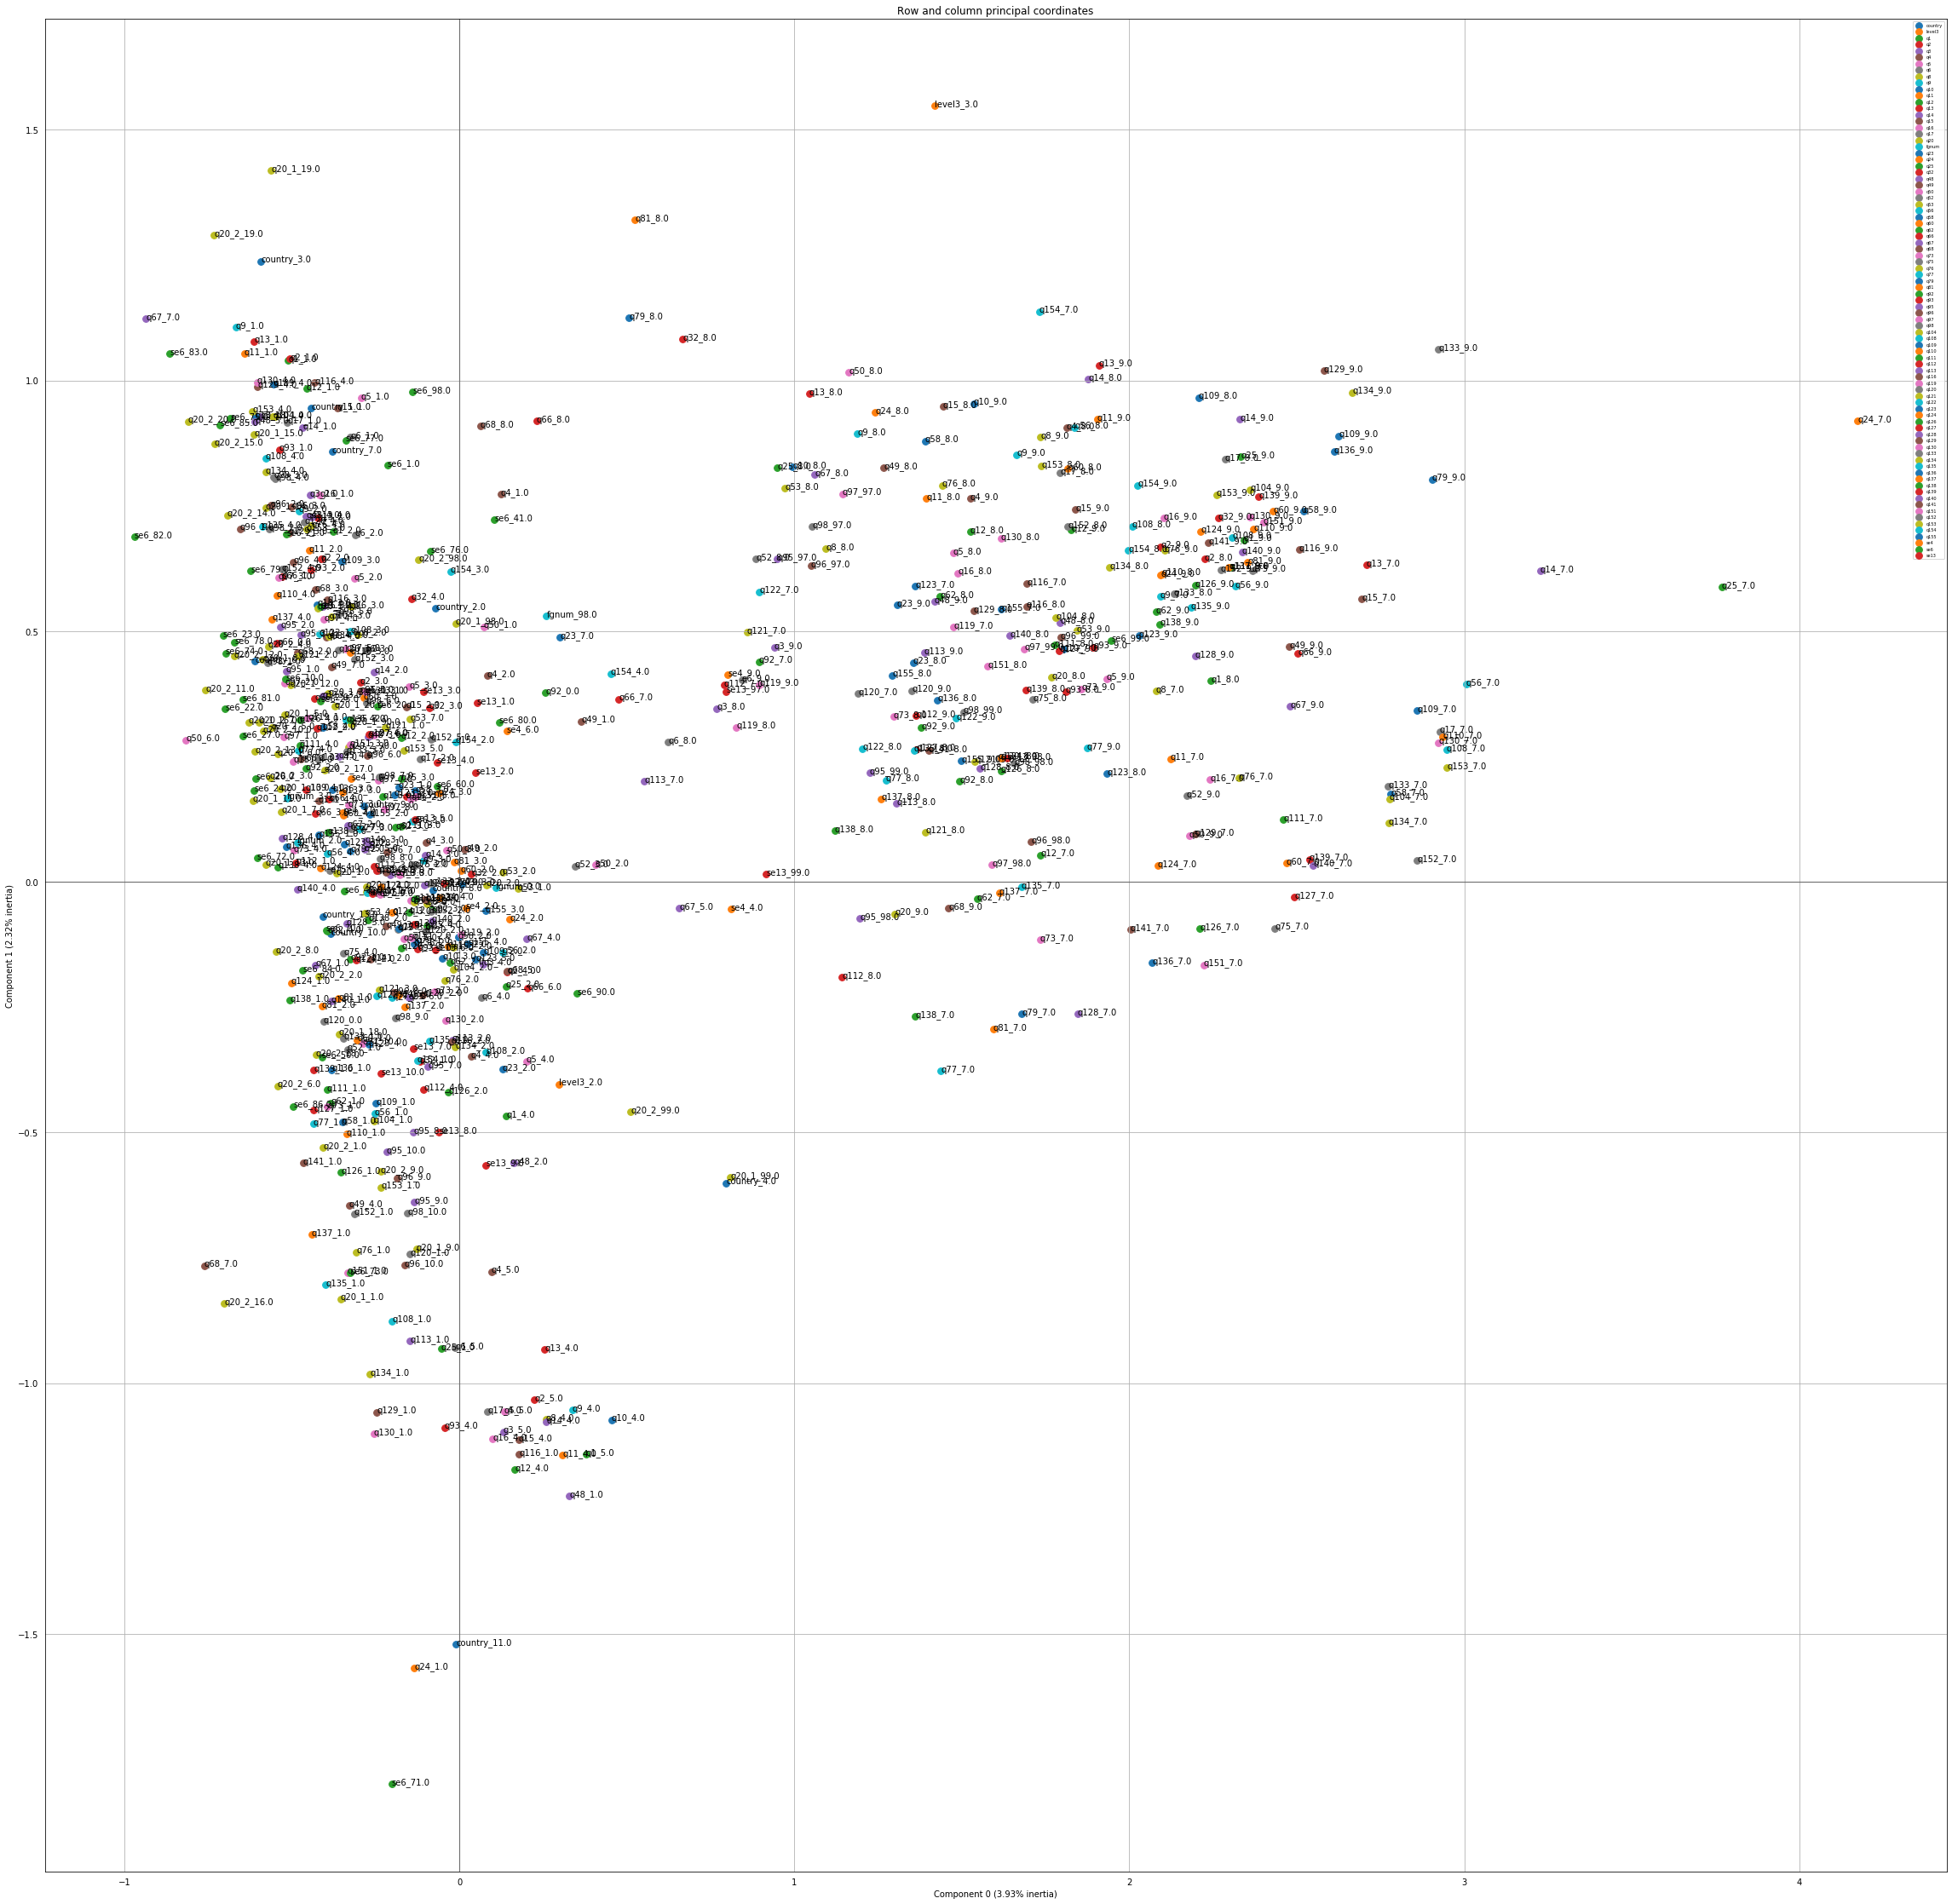

In [132]:
df2_trunc_no_nan_stringy = df2_trunc_no_nan.astype(str)
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df2_trunc_no_nan_stringy)
df2_trunc_mca = mca.transform(df2_trunc_no_nan_stringy)
df2_trunc_mca.head()

ax = mca.plot_coordinates(X=df2_trunc_no_nan_stringy,
    ax=None,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=60,
    show_column_labels=True)
plt.legend(prop={'size': 5})
plt.savefig("MCA.pdf", format='pdf', bbox_inches='tight')


In [133]:
col_coords = mca.column_coordinates(df2_trunc_no_nan_stringy)
x = col_coords[0]
y = col_coords[1]

prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

plot_coord = pd.DataFrame(columns = ["question", "answer", "x_coord", "y_coord"])
for prefix in prefixes.unique():
    mask = prefixes == prefix
    for i, label in enumerate(col_coords[mask].index):
        to_append = [label.rsplit('_', -1)[0], label.rsplit('_', -1)[1], x[mask][i], y[mask][i]]
        df_length = len(plot_coord)
        plot_coord.loc[df_length] = to_append

arr_coords = np.array(plot_coord[['x_coord', 'y_coord']])

In [159]:
arr_coords

array([[-0.4424665 ,  0.94469429],
       [-0.3842917 , -0.10369239],
       [-0.01024182, -1.52097097],
       ...,
       [ 0.79672388,  0.37940809],
       [ 1.6354687 ,  0.24632137],
       [ 0.9160359 ,  0.01539317]])

In [134]:
tree = KDTree(arr_coords, leaf_size=2) 
clusters = []
for i, point in enumerate(arr_coords):
    ind = tree.query_radius(point.reshape(1, -1), r=0.2)
    for indx in ind:
        q_a = np.array(plot_coord.iloc[indx][["question", "answer"]])
        clusters.append(q_a)
    

In [87]:
for c in clusters:
    if "q66" in np.array(c)[:,0] and c[np.where(np.array(c)[:,0] == "q66")][0][1] == '0.0' and "level3" in np.array(c)[:,0]:
        print(c)
        print('\n')

[['q136' '3.0']
 ['se4' '1.0']
 ['q20' '2']
 ['q98' '1.0']
 ['q66' '0.0']
 ['q151' '4.0']
 ['q20' '1']
 ['q77' '4.0']
 ['q97' '1.0']
 ['q126' '4.0']
 ['q68' '1.0']
 ['q92' '2.0']
 ['q133' '4.0']
 ['q111' '4.0']
 ['q112' '2.0']
 ['q119' '1.0']
 ['q20' '1']
 ['q97' '2.0']
 ['se6' '10.0']
 ['q66' '2.0']
 ['q20' '1']
 ['q95' '2.0']
 ['q95' '1.0']
 ['q68' '2.0']
 ['q121' '2.0']
 ['q122' '1.0']
 ['q95' '3.0']
 ['q20' '2']
 ['q95' '4.0']
 ['q133' '3.0']
 ['q20' '2']
 ['q151' '3.0']
 ['q58' '4.0']
 ['q20' '1']
 ['q135' '3.0']
 ['se6' '42.0']
 ['q20' '1']
 ['se6' '25.0']
 ['q113' '3.0']
 ['q20' '1']
 ['q49' '7.0']
 ['q152' '3.0']
 ['q68' '4.0']
 ['q134' '3.0']
 ['q120' '3.0']
 ['q97' '5.0']
 ['q110' '3.0']
 ['q108' '3.0']
 ['q96' '6.0']
 ['q48' '3.0']
 ['q97' '6.0']
 ['q127' '4.0']
 ['q121' '1.0']
 ['q60' '3.0']
 ['level3' '1.0']
 ['q96' '5.0']
 ['q2' '3.0']
 ['q8' '2.0']
 ['q130' '3.0']
 ['q6' '3.0']
 ['q98' '6.0']
 ['q14' '2.0']
 ['se6' '20.0']
 ['q20' '1']
 ['q3' '3.0']
 ['se6' '30.0']
 ['q1

In [98]:
print()
for name, group in plot_coord.groupby('question')['answer']:
    print(name)
    u_ent = list(group.unique())
    u_ent.sort()
    print(u_ent)


country
['1.0', '10.0', '11.0', '13.0', '2.0', '3.0', '4.0', '6.0', '7.0', '8.0', '9.0']
fgnum
['0.0', '1.0', '2.0', '3.0', '98.0']
level3
['1.0', '2.0', '3.0']
q1
['1.0', '2.0', '3.0', '4.0', '5.0', '8.0', '9.0']
q10
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q104
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q108
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q109
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q11
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q110
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q111
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q112
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q113
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q116
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q119
['1.0', '2.0', '7.0', '8.0', '9.0']
q12
['1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q120
['0.0', '1.0', '2.0', '3.0', '4.0', '7.0', '8.0', '9.0']
q121
['1.0', '2.0', '3.0', '7.0', '8.0', '9.0']
q122
['1.0', '2.0', '7.0', '8.0'

In [ ]:
#Unhelpful:
#q1: 8.0, 9.0
#q10: 7.0, 8.0, 9.0
#q104: 7.0, 8.0, 9.0
#q108: 7.0, 8.0, 9.0
#q109: 7.0, 8.0, 9.0
#q11: 7.0, 8.0, 9.0
#q110: 7.0, 8.0, 9.0
#q111: 7.0, 8.0, 9.0
#q112: 7.0, 8.0, 9.0
#q113: 7.0, 8.0, 9.0
#q116: 7.0, 8.0, 9.0
#q119: 7.0, 8.0, 9.0
#q12: 7.0, 8.0, 9.0
#q120: 7.0, 8.0, 9.0
#q121: 7.0, 8.0, 9.0
#q122: 7.0, 8.0, 9.0
#q123: 7.0, 8.0, 9.0
#q124: 7.0, 8.0, 9.0
#q126: 7.0, 8.0, 9.0
#q127: 7.0, 8.0, 9.0
#q128: 7.0, 8.0, 9.0
#q129: 7.0, 8.0, 9.0
#q13: 7.0, 8.0, 9.0
#q130: 7.0, 8.0, 9.0
#q133: 7.0, 8.0, 9.0
#q134: 7.0, 8.0, 9.0
#q135: 7.0, 8.0, 9.0
#q136: 7.0, 8.0, 9.0
#q137: 7.0, 8.0, 9.0
#q138: 7.0, 8.0, 9.0
#q139: 7.0, 8.0, 9.0
#q14: 7.0, 8.0, 9.0
#q140: 7.0, 8.0, 9.0
#q141: 7.0, 8.0, 9.0
#q15: 7.0, 8.0, 9.0
#q151: 7.0, 8.0, 9.0
#q152: 7.0, 8.0, 9.0
#q153: 7.0, 8.0, 9.0
#q154: 7.0, 8.0, 9.0
#q155: 7.0, 8.0, 9.0
#q16: 7.0, 8.0, 9.0
#q17: 7.0, 8.0, 9.0
#q2: 8.0, 9.0
#q20: 8.0, 9.0
#q23: 7.0, 8.0, 9.0
#q24: 7.0, 8.0, 9.0
#q25: 7.0, 8.0, 9.0
#q3: 8.0, 9.0
#q32: 7.0, 8.0, 9.0
#q4: 8.0, 9.0
#q48: 8.0, 9.0
#q49: 7.0, 8.0, 9.0
#q5: 8.0, 9.0
#q50: 7.0, 8.0, 9.0
#q52: 7.0, 8.0, 9.0
#q53: 7.0, 8.0, 9.0
#q56: 7.0, 8.0, 9.0
#q58: 7.0, 8.0, 9.0
#q6: 8.0, 9.0
#q60: 7.0, 8.0, 9.0
#q62: 7.0, 8.0, 9.0
#q66: 7.0, 8.0, 9.0
#q67: 7.0, 8.0, 9.0
#q68: 7.0, 8.0, 9.0
#q73: 7.0, 8.0, 9.0
#q75: 7.0, 8.0, 9.0
#q76: 7.0, 8.0, 9.0
#q77: 7.0, 8.0, 9.0
#q79: 7.0, 8.0, 9.0
#q8: 7.0, 8.0, 9.0
#q81: 7.0, 8.0, 9.0
#q9: 7.0, 8.0, 9.0
#q92: 7.0, 8.0, 9.0
#q93: 8.0, 9.0
#q95: 97.0, 98.0, 99.0 ######
#q96: 97.0, 98.0, 99.0 ######
#q97: 97.0, 98.0, 99.0 ######
#q98: 97.0, 98.0, 99.0 ######
#se13: 97.0, 98.0, 99.0 ######
#se4: 9.0
#se6: 98.0, 99.0

In [135]:
for c in clusters:
    if np.array(c)[:,1][np.isin(np.array(c)[:,1], np.array(["7.0", "8.0", "9.0", "97.0", "98.0", "99.0"]))].shape == np.array(c)[:,1].shape:
        print(c)
        print('\n')


[['q16' '7.0']
 ['q11' '7.0']
 ['q8' '7.0']
 ['q1' '8.0']
 ['q128' '9.0']
 ['q138' '9.0']
 ['q135' '9.0']
 ['q126' '9.0']]


[['q56' '9.0']
 ['q126' '9.0']
 ['q2' '8.0']
 ['q141' '9.0']
 ['q152' '9.0']
 ['q137' '9.0']
 ['q140' '9.0']
 ['q111' '9.0']
 ['q124' '9.0']
 ['q108' '9.0']
 ['q32' '9.0']
 ['q153' '9.0']
 ['q17' '9.0']
 ['q25' '9.0']
 ['q75' '9.0']
 ['q1' '9.0']
 ['q81' '9.0']
 ['q110' '9.0']
 ['q151' '9.0']
 ['q116' '9.0']
 ['q130' '9.0']
 ['q60' '9.0']
 ['q58' '9.0']
 ['q139' '9.0']
 ['q104' '9.0']]


[['q128' '9.0']
 ['q138' '9.0']
 ['q62' '9.0']
 ['q9' '7.0']
 ['q133' '8.0']
 ['q135' '9.0']
 ['q56' '9.0']
 ['q24' '9.0']
 ['q2' '9.0']
 ['q110' '8.0']
 ['q76' '9.0']
 ['q126' '9.0']
 ['q2' '8.0']
 ['q141' '9.0']
 ['q152' '9.0']
 ['q137' '9.0']
 ['q140' '9.0']
 ['q111' '9.0']
 ['q124' '9.0']
 ['q16' '9.0']
 ['q108' '9.0']
 ['q32' '9.0']
 ['q153' '9.0']
 ['q75' '9.0']
 ['q1' '9.0']
 ['q81' '9.0']
 ['q110' '9.0']
 ['q151' '9.0']
 ['q130' '9.0']
 ['q104' '9.0']]


[['q134' '8.0']
 

In [136]:
unhelpful_values = ["7.0", "8.0", "9.0", "97.0", "98.0", "99.0"]
df2_trunc_no_nan_stringy['num_unhelpful'] = df2_trunc_no_nan_stringy.apply(axis=1, \
                                                                           func=lambda x: sum([int(i) for i in list(x.isin(unhelpful_values))]))
                                                                          

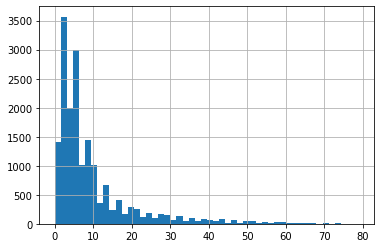

In [137]:
df2_trunc_no_nan_stringy['num_unhelpful'].hist(bins=50)

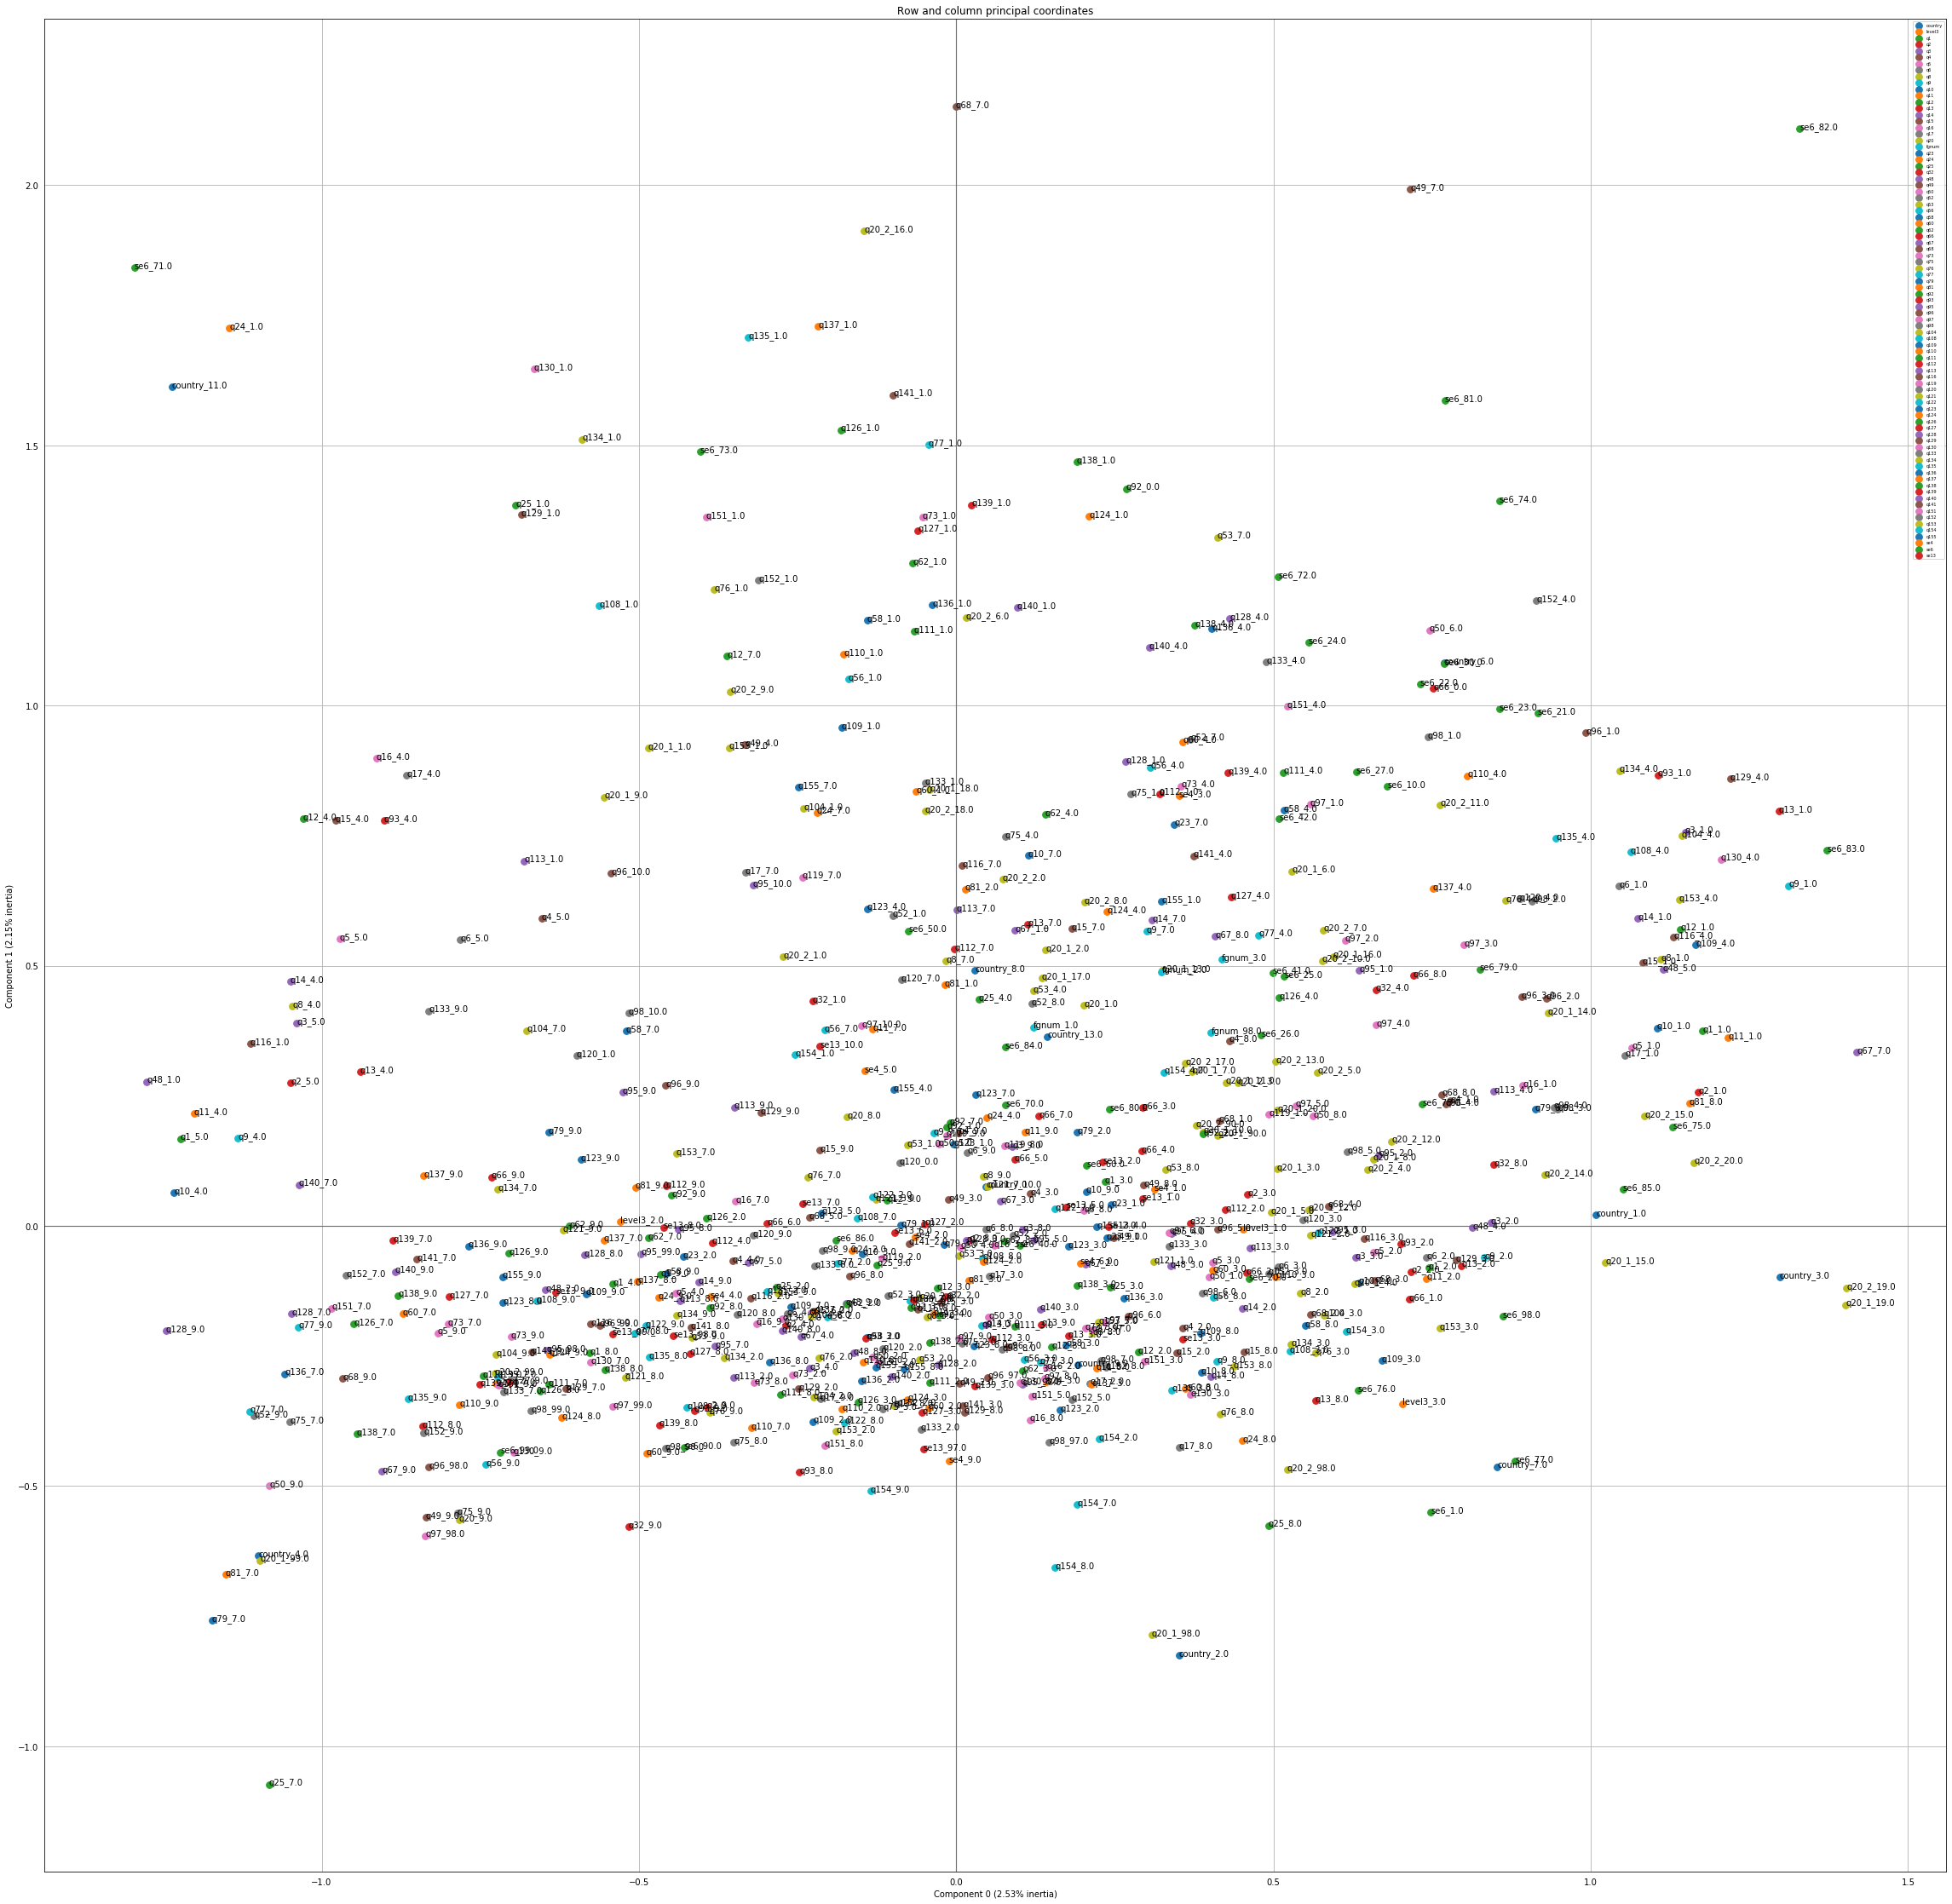

In [138]:
df2_trunc_no_nan_stringy_helpful = df2_trunc_no_nan_stringy.loc[df2_trunc_no_nan_stringy['num_unhelpful'] <= 20]
if 'num_unhelpful' in df2_trunc_no_nan_stringy_helpful.columns:
    df2_trunc_no_nan_stringy_helpful = df2_trunc_no_nan_stringy_helpful.drop(['num_unhelpful'], axis=1, inplace=False)

mca2 = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca2.fit(df2_trunc_no_nan_stringy_helpful)
df2_trunc_mca2 = mca.transform(df2_trunc_no_nan_stringy_helpful)

ax2 = mca2.plot_coordinates(X=df2_trunc_no_nan_stringy_helpful,
    ax=None,
    figsize=(40, 40),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=60,
    show_column_labels=True)
plt.legend(prop={'size': 5})
plt.savefig("MCA2.pdf", format='pdf', bbox_inches='tight')


In [165]:
col_coords2 = mca2.column_coordinates(df2_trunc_no_nan_stringy_helpful)
x2 = col_coords2[0]
y2 = col_coords2[1]

prefixes2 = col_coords2.index.str.split('_').map(lambda x: x[0])

plot_coord2 = pd.DataFrame(columns = ["question", "answer", "x_coord", "y_coord"])
for prefix in prefixes2.unique():
    mask = prefixes2 == prefix
    for i, label in enumerate(col_coords2[mask].index):
        to_append = [label.rsplit('_', -1)[0], label.rsplit('_', -1)[1], x2[mask][i], y2[mask][i]]
        df_length = len(plot_coord2)
        plot_coord2.loc[df_length] = to_append

arr_coords2 = np.array(plot_coord2[['x_coord', 'y_coord']])
arr_coords2

array([[ 1.00850299,  0.02062729],
       [ 0.04668955,  0.07597861],
       [-1.23572806,  1.61253605],
       ...,
       [-0.05161936, -0.42861903],
       [-0.44556286, -0.21094518],
       [-0.54196562, -0.20709313]])

In [166]:
tree2 = KDTree(arr_coords2, leaf_size=2) 
clusters2 = []
for i, point in enumerate(arr_coords2):
    ind = tree2.query_radius(point.reshape(1, -1), r=0.03)
    for indx in ind:
        q_a = np.array(plot_coord2.iloc[indx][["question", "answer"]])
        clusters2.append(q_a)

In [154]:
seen_groups = []
for c in clusters2:
    c.sort()
    if c not in seen_groups:
        seen_groups.append(c)
    if len(c) > maxlen:
        maxlen = len(c)
#     if len(c) > 2 and len(c) < 6:
#         print(c)
#         print('\n')
print(seen_groups)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


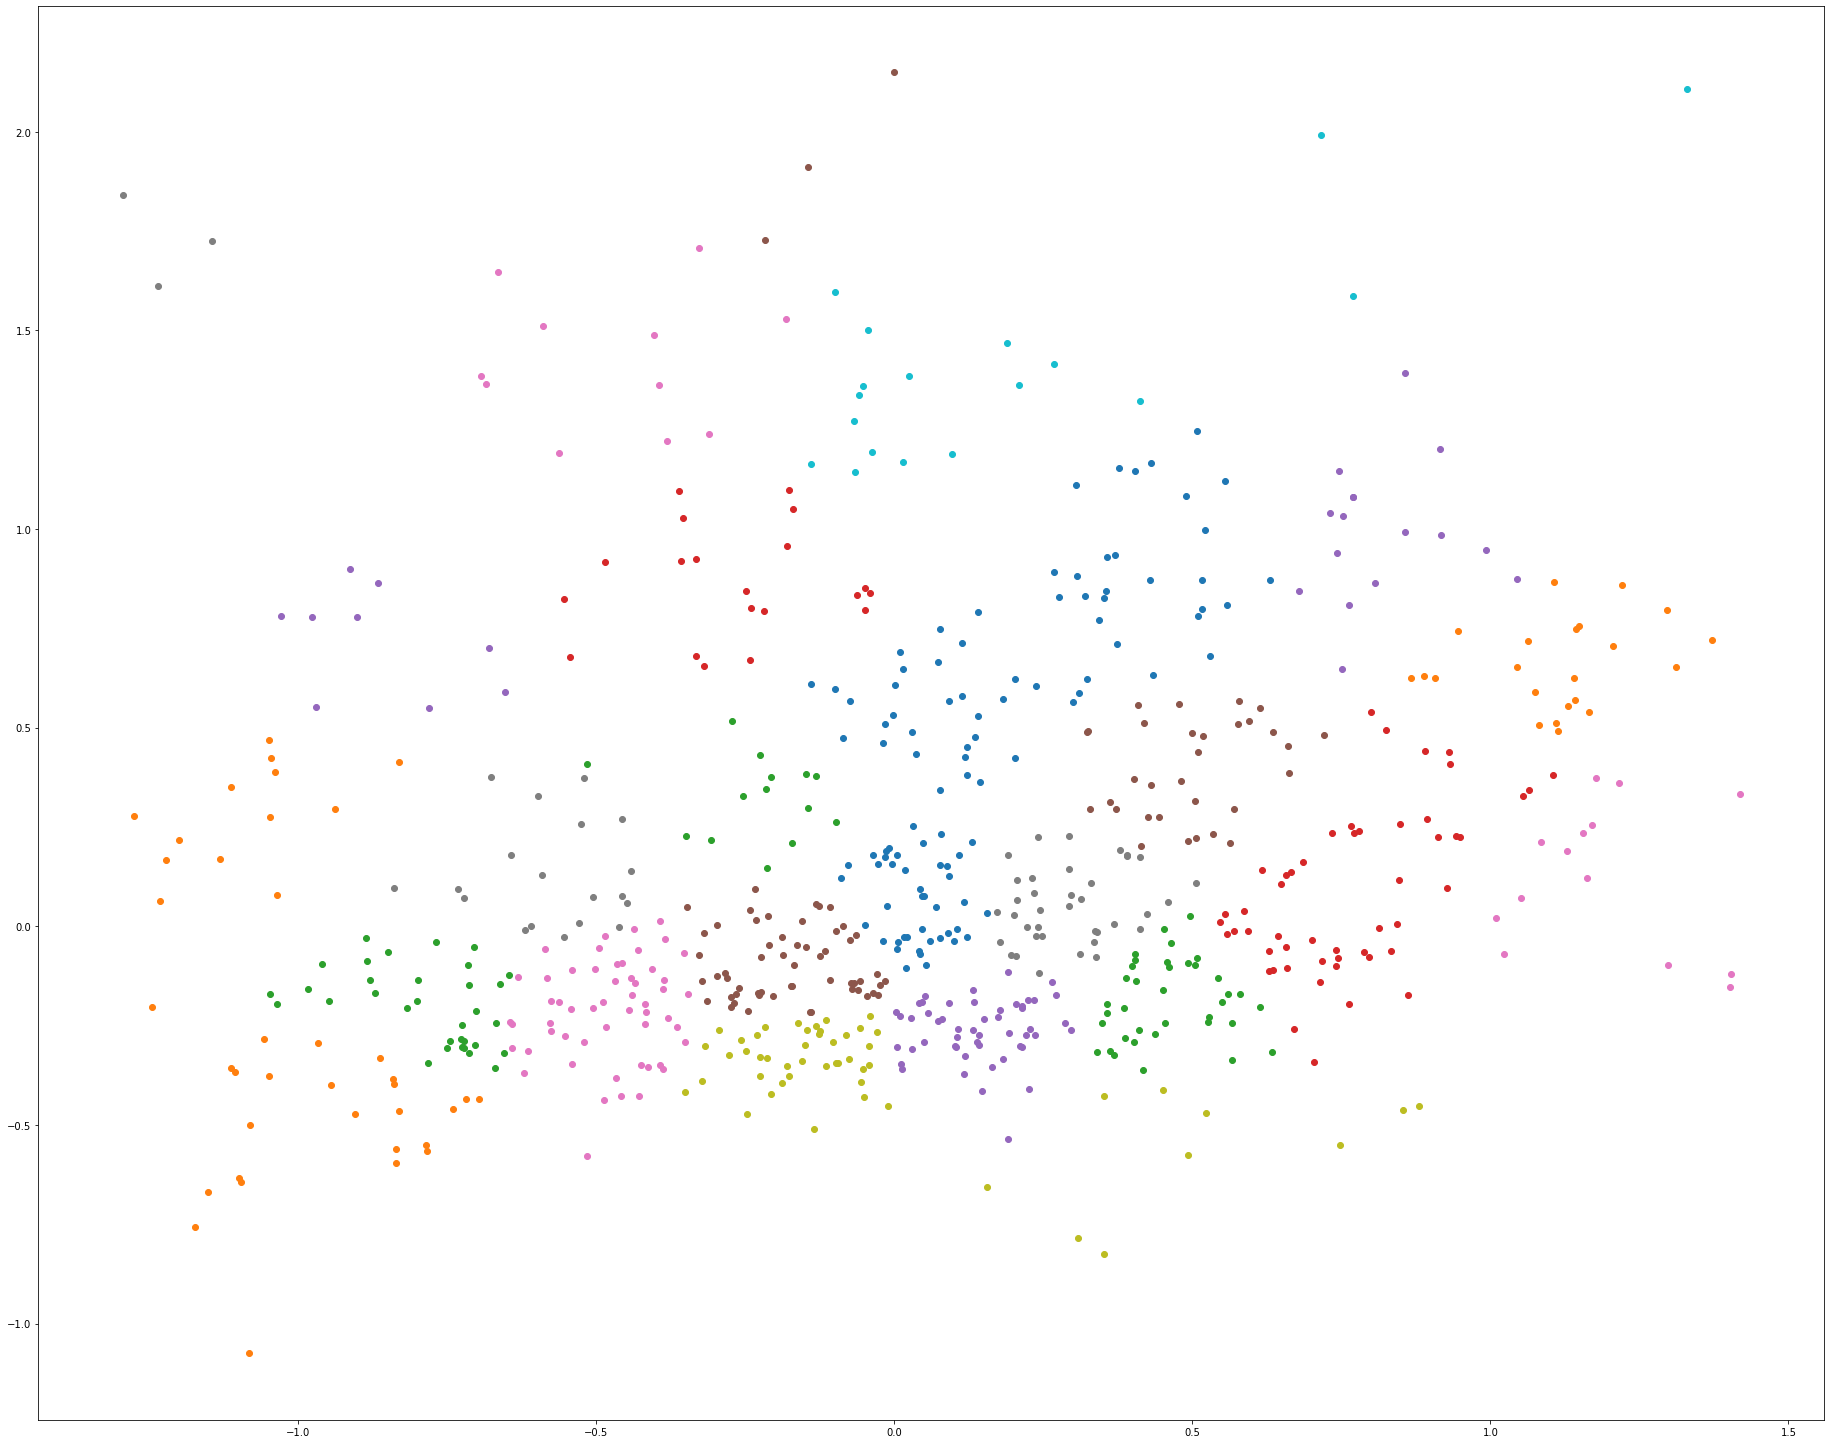

In [172]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
model = AffinityPropagation(damping=0.5)
# fit the model
model.fit(arr_coords2)
# assign a cluster to each example
yhat = model.predict(arr_coords2)
# retrieve unique clusters
clu = unique(yhat)
# create scatter plot for samples from each cluster
plt.rcParams['figure.figsize'] = (32,26)
for c in clu:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == c)
	# create scatter of these samples
	pyplot.scatter(arr_coords2[row_ix, 0], arr_coords2[row_ix, 1])
# show the plot
pyplot.show()

In [173]:
plot_coord2['cluster'] = yhat

In [196]:
for name, group in plot_coord2.groupby('cluster'):
    print(np.array(group[['question', 'answer']]))
    print('\n')

[['country' '10.0']
 ['q2' '8.0']
 ['q3' '8.0']
 ['q3' '9.0']
 ['q4' '3.0']
 ['q4' '9.0']
 ['q6' '8.0']
 ['q6' '9.0']
 ['q8' '9.0']
 ['q9' '9.0']
 ['q11' '9.0']
 ['q16' '3.0']
 ['q17' '3.0']
 ['q24' '4.0']
 ['q49' '3.0']
 ['q50' '4.0']
 ['q50' '5.0']
 ['q52' '2.0']
 ['q53' '1.0']
 ['q53' '3.0']
 ['q62' '8.0']
 ['q66' '5.0']
 ['q66' '7.0']
 ['q67' '3.0']
 ['q79' '3.0']
 ['q81' '3.0']
 ['q92' '1.0']
 ['q92' '7.0']
 ['q95' '5.0']
 ['q108' '8.0']
 ['q119' '8.0']
 ['q119' '9.0']
 ['q120' '0.0']
 ['q121' '7.0']
 ['q122' '7.0']
 ['q123' '1.0']
 ['q123' '7.0']
 ['q124' '2.0']
 ['q127' '2.0']
 ['q128' '3.0']
 ['se6' '40.0']
 ['se6' '70.0']]


[['q1' '5.0']
 ['q2' '5.0']
 ['q3' '5.0']
 ['q8' '4.0']
 ['q9' '4.0']
 ['q10' '4.0']
 ['q11' '4.0']
 ['q13' '4.0']
 ['q14' '4.0']
 ['q48' '1.0']
 ['q116' '1.0']
 ['q133' '9.0']
 ['q140' '7.0']]


[['level3' '1.0']
 ['q4' '2.0']
 ['q5' '3.0']
 ['q6' '3.0']
 ['q8' '2.0']
 ['q9' '8.0']
 ['q10' '8.0']
 ['q13' '8.0']
 ['q14' '2.0']
 ['q14' '8.0']
 ['q15' '2.0']

In [197]:
# read txt file
txt_name = '/Users/kirill/Downloads/data 2/W2 Merged Data/2w-3rd_release_all/merge/W2_codebook_20170315.txt'
with open(txt_name, 'rb') as f:
    contents = f.read()
#     print(str(contents).lower())

In [198]:
codebook = str(contents).lower()
codebook = codebook.split(r'\r\n') # split string by newline
codebook = [x.replace('\\', '') for x in codebook] # remove \\ from the string
codebook = pd.DataFrame(codebook)
codebook = codebook[0].str.strip() # delete spaces in the beginning of string
codebook = codebook.str.split(' ', 1, expand=True) # split string by first space, so question name and answer name are in 1st col
# rename columns
codebook.columns = ['code', 'meaning']
codebook[codebook['code']=='country']['meaning'].values[0]
question_index = codebook[codebook['code']=='country'].index.values[0]
df_cluster = pd.DataFrame(columns=['code', 'meaning'])
df_cluster = pd.concat([df_cluster, pd.DataFrame([['000', '000']], columns=['code', 'meaning'])])


In [199]:
df_cluster = pd.DataFrame(columns=['code', 'meaning'])

for name, group in plot_coord2.groupby('cluster'):
    c = np.array(group[['question', 'answer']])
    df_cluster = df_cluster.append(pd.DataFrame([['---', '---']], 
            columns=['code', 'meaning']), ignore_index=True) # add a blank line to differentiate clusters

    for i in range(len(c)):

        question_code = c[i,:][0]
        question_meaning = codebook[codebook['code'] == question_code]['meaning'].values[0]
        print(question_code, question_meaning)
        df_cluster = df_cluster.append(pd.DataFrame([[question_code, question_meaning]], 
            columns=['code', 'meaning']), ignore_index=True)

        answer_code = c[i,:][1].split('.')[0]
        question_index = codebook[codebook['code']==question_code].index.values[0]
        answer_meaning = codebook.iloc[question_index:][codebook.code==answer_code].head(1)['meaning'].values[0]
        print(answer_code, answer_meaning)
        df_cluster = df_cluster.append(pd.DataFrame([[answer_code, answer_meaning]], 
            columns=['code', 'meaning']), ignore_index=True)

    print('\n')
        
df_cluster.to_csv('clusters2.csv', index=False)

country 'country code'
10 'singapore'
q2    'how would you dsecribe the change in the economic condition of our country over the last few years?'
8 "can't choose"
q3    'what do you think will be the state of our country's economic condition a few years from now?'
8 "can't choose"
q3    'what do you think will be the state of our country's economic condition a few years from now?'
9 'decline to answer'
q4    'as for your own family, how do you rate the economic situation of your family today?'
3 'so-so [not good nor bad]'
q4    'as for your own family, how do you rate the economic situation of your family today?'
9 'decline to answer'
q6    'what do you think the economic situation of your family will be a few years from now?'
8 "can't choose"
q6    'what do you think the economic situation of your family will be a few years from now?'
9 'decline to answer'
q8 'the courts'
9 'decline to answer' /
q9 'national government in the capital city'
9 'decline to answer' /
q11 'parliament'
9 'd

<ipython-input-199-53395ebc97d3>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  answer_meaning = codebook.iloc[question_index:][codebook.code==answer_code].head(1)['meaning'].values[0]



q1    'how would you rate the overll economic condition of our country today?'
5 'very good'
q2    'how would you dsecribe the change in the economic condition of our country over the last few years?'
5 'much better'
q3    'what do you think will be the state of our country's economic condition a few years from now?'
5 'much better'
q8 'the courts'
4 'a great deal of trust'
q9 'national government in the capital city'
4 'a great deal of trust'
q10 'political parties'
4 'a great deal of trust'
q11 'parliament'
4 'a great deal of trust'
q13 'the military'
4 'a great deal of trust'
q14 'the police'
4 'a great deal of trust'
q48 'how would you describe the present political situation in our country? (new)'*
1 'very good'
q116    'how well do you think the government responds to what people want?'
1 'very responsive'
q133    'people with little or no education should have as much say in politics as highly-educated people.'
9 'decline to answer'
q140    'if people have too many different wa

country 'country code'
11 'vietnam'
q24 'how much trust do you have in esch of the following types of people? "your relatives" '
1 'none at all'
se6 'religion'
71 'sikhism'


country 'country code'
2 'hong kong
country 'country code'
7 'taiwan'
q17 '17 television'**
8 "can't choose"
q20 are you a member of any organization or formal groups?*
1 'yes'
q20 are you a member of any organization or formal groups?*
2 'no'
q24 'how much trust do you have in esch of the following types of people? "your relatives" '
8 'canxa5x8ct choose'
q25 'how much trust do you have in esch of the following types of people? "your neighbors" '
8 'canxa5x8ct choose'
q154    'how proud are you to be a citizen of (country)? are you? (new)n'
8 'canxa5x8ct choose'
se6 'religion'
1 'traditional folk religion (shenism)'
se6 'religion'
77 'i-kuan tao'


q49 'how interested would you say you are in politics?'
7 'no answer'
se6 'religion'
81 'jehovah witness'
se6 'religion'
82 'mormons'


country 'country code'
13 'mala

7 'don't understand'
q135    'the government should decide whether certain ideas should be allowed to be discussed in society.'
7 'don't understand'
q136    'harmony of the community will be disrupted if people organize lots of groups.'
9 'decline to answer'
q138    'if the government is constantly checked [i.e. monitored and supervised] by the legislature, it cannot possibly accomplish great things.'
9 'decline to answer'
q139    'if we have political leaders who are morally upright, we can let them decide everything.'
7 'don't understand'
q139    'if we have political leaders who are morally upright, we can let them decide everything.'
9 'decline to answer'
q140    'if people have too many different ways of thinking, society will be chaotic.'
9 'decline to answer'
q141    'when the country is facing a difficult situation, it is ok for the government to disregard the law in order to deal with the situation.'
7 'don't understand'
q141    'when the country is facing a difficult situatio

7 'don't understand'
q109    'people have basic necessities like food, clothes, and shelter.'
7 'don't understand'
q116    'how well do you think the government responds to what people want?'
2 'largely responsive'
q116    'how well do you think the government responds to what people want?'
8 'can't choose'
q119    'have you or anyone you know personally witnessed an act of corruption or bribe-taking by a politician or government official in the past year?'
2 'no (never witnessed)'
q120    'in your opinion, is the government working to crackdown corruption and root out bribes? (new)'
9 'decline to answer'
q121    'which of the following statements comes closest to your own opinion?'
3 'democracy is alwasys preferable to any other kind of government'
q122    'which of the following statements comes closer to your own view?'
2 'democracy is capable of solving the problems of our society. '
q123    'if you had to choose between democracy and economic development, which would you say is mo

8 'canxa5x8ct choose'
q50 'how often do you follow news about politics and government?'*
2 ' not even once a week'
q53 'how much impact do you feel government policies have on your daily life? (hong kong: beijing government)'*
2 'a little impact'
q60 'for the sake of the family, the individual should put his personal interests second. '
2 'somewhat agree'
q73 'the best way to deal with complicated political issues should be to leave them to the future. (new)'*
2 'somewhat agree'
q73 'the best way to deal with complicated political issues should be to leave them to the future. (new)'*
8 'canxa5x8ct choose'
q75 'cruel criminals should be punished immediately without regard to time-consuming legal processes. (new)'*
3 'somewhat disagree'
q75 'cruel criminals should be punished immediately without regard to time-consuming legal processes. (new)'*
8 'canxa5x8ct choose'
q76 'for the sake of the national community/society, the individual should be prepared to sacrifice his/her personal intere

4 'strongly disagree'
q135    'the government should decide whether certain ideas should be allowed to be discussed in society.'
4 'strongly disagree'
q153    'a citizen should always remain loyal only to his country, no matter how imperfect it is or what wrong it has done."(new)'**
4 'strongly disagree'
se6 'religion'
83 'dating dann'


q11 'parliament'
7 'do not understand the question'
q15 'local government
9 'decline to answer' /
q20 are you a member of any organization or formal groups?*
8 'can't choose'
q20 are you a member of any organization or formal groups?*
2 'no'
q32 'generally speaking, how safe is living in this city/ town/ village xa5v very safe, safe, unsafe or very unsafe? '
1 'very safe'
q56 'even if parents' demands are unreasonable, children still should do what they ask.'
7 'don't understand'
q97  'to what extent would you want our country to be democratic now?'
10 'complete democracy'
q98  'here is a similar scale of 1 to 10 measuring the extent to which people th

1 'strongly agree'
q151    'a citizen who does not actively participate in the affairs of his local and national community is not performing his duties.(new)'**
1 'strongly agree'
q152    'citizens should always obey laws and regulations, even if they disagree with them.(new)'**
1 'strongly agree'
se6 'religion'
73 'aglipayan'


q1    'how would you rate the overll economic condition of our country today?'
3 'so-so [not good nor bad]'
q2    'how would you dsecribe the change in the economic condition of our country over the last few years?'
3 'about the same'
q5    'how would you compare the current economic condition of your family with what it was a few years ago?'
8 "can't choose"
q10 'political parties'
9 'decline to answer' /
q20 are you a member of any organization or formal groups?*
1 'yes'
q20 are you a member of any organization or formal groups?*
1 'yes'
q20 are you a member of any organization or formal groups?*
1 'yes'
q20 are you a member of any organization or formal grou